<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/BTC-Coin-Price-Prediction-LSTM/blob/main/BTC_LSTM_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A Report on Bit Coin Price Prediction Using LSTM Model**

### **Importing the Necessary Libraries for the Analysis**
Brief description of each library and why it is used in this project:

1. **Pandas (pd):**Pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrames that make it easy to handle and manipulate structured data.

2. **Seaborn (sns):**Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

3. **NumPy (np):**NumPy is a fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

4. **yfinance:**yfinance is a Python library that provides an easy way to download historical market data from Yahoo Finance.

5. **Matplotlib.pyplot (plt):**Matplotlib is a comprehensive 2D plotting library. The pyplot module provides a MATLAB-like interface for creating static, interactive, and animated plots.

6. **MinMaxScaler (from sklearn.preprocessing):**MinMaxScaler is a preprocessing technique in scikit-learn that scales and transforms data to a specific range, typically between 0 and 1.

7. **TimeSeriesSplit (from sklearn.model_selection):**TimeSeriesSplit is a cross-validator for time series data. It provides train/test indices to split time series data into train/test sets while preserving temporal order.

8. **TensorFlow and Keras:**TensorFlow is an open-source machine learning framework, and Keras is a high-level neural networks API that runs on top of TensorFlow.

9. **LSTM, Dense, Dropout (from tensorflow.keras.layers):**These are specific layers used in building neural network architectures with Keras.LSTM (Long Short-Term Memory) layers are particularly effective for modeling sequential data, such as time series.

10. **Sequential, plot_model (from tensorflow.keras.models and tensorflow.keras.utils):**Sequential is a linear stack of layers for building neural network models. plot_model is a utility function for creating visual representations of the model.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

### **Loading the Dataset**
The "yfinance" or "yf" library is a Python package that allows users to download historical market data, including stock prices, dividends, and split data from Yahoo Finance. It provides a convenient way to access financial data for a wide range of assets, such as stocks, exchange-traded funds (ETFs), indices, and more.

Here's a brief description of what you can do with the data obtained using the "yf" library:

- **Stock Prices**: Retrieve historical and real-time stock prices for specific tickers. <br>
- **Dividends and Splits**: Access information about dividend payments and stock splits for a given security.<br>
- **Historical Data**: Obtain historical price data for various time intervals (daily, weekly, monthly).<br>
- **Financial Statistics**: Retrieve key financial metrics, such as market capitalization, volume, and more.

The ability to access such data is valuable for financial analysis, quantitative modeling, and the development of trading strategies. Researchers, analysts, and developers often use "yf" to collect financial data for further analysis and visualization in Python environments. Keep in mind that the availability of certain data may depend on the asset and the data source's coverage.

In [ ]:
df = yf.download('BTC-USD', start='2015-01-01', end='2024-01-24',interval="1d")

[*********************100%%**********************]  1 of 1 completed


### **Exploring the Dataset**

The dataset has important information like Date, Open, High, Low, Close, Adj Close, and Volume. We're focusing on a specific time period of five years. This duration is chosen for the LSTM Model to analyze and make predictions. These details are crucial for the model to understand and find patterns in the data during this five-year span, making its analysis more effective.

In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800
2015-01-08,294.135010,294.135010,282.174988,283.348999,283.348999,19982500
2015-01-09,282.382996,291.114014,280.532990,290.407990,290.407990,18718600


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3.287000e+03
mean,15030.227822,15381.631744,14651.962175,15041.625620,15041.625620,1.708190e+10
std,16240.295312,16630.177156,15803.040490,16242.203249,16242.203249,1.915408e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1185.275024,1206.515015,1172.234985,1187.840027,1187.840027,3.349970e+08
50%,8658.991211,8826.943359,8389.889648,8659.487305,8659.487305,1.278036e+10
75%,25141.166016,25937.496094,24849.660156,25369.524414,25369.524414,2.741688e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


### **Data Preprocessing**

#### **1. Removing the Unwanted Column**
By eliminating columns that weren't essential, we aimed to simplify the dataset. This process helps the model work more accurately. We decided to remove the 'Close' column while keeping the 'Adj Close' column for our analysis. This choice was made to improve the overall effectiveness of our modeling approach.

In [ ]:
df.drop('Close', axis=1,inplace=True)

In [ ]:
df.shape

(3287, 5)

#### **2. Checking for the Unwanted Column**

The dataset exhibits a notable absence of missing values, indicating a balanced and complete dataset. Consequently, there is no necessity for imputation procedures, affirming the dataset's integrity and suitability for subsequent analyses.

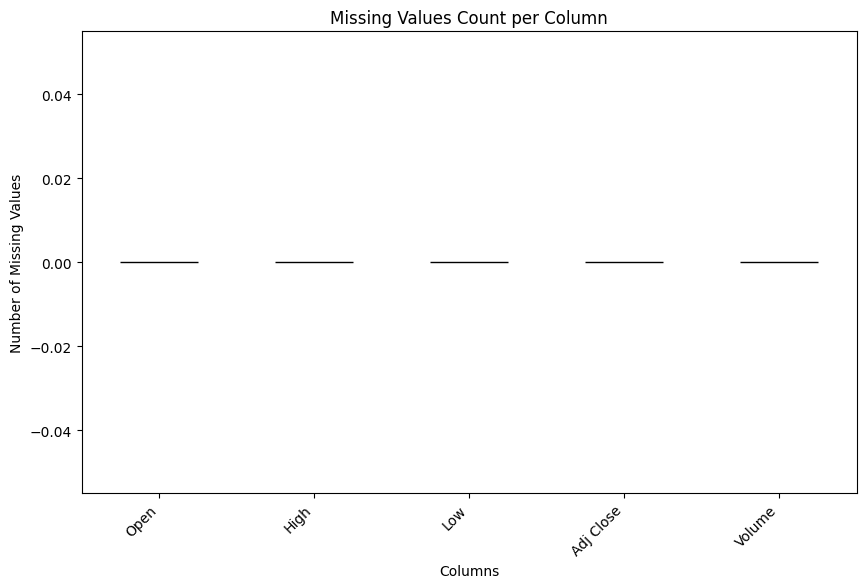

In [ ]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **3. Plotting the graph of change of price over time (2015-2024)**

The chart gives a picture of how prices went up and down from January 2015 to January 2024, covering nine years. Those rises and falls in the graph tell us that there are repeating patterns and general trends in the data, indicating seasonality and trend in the BitCoin Dataset

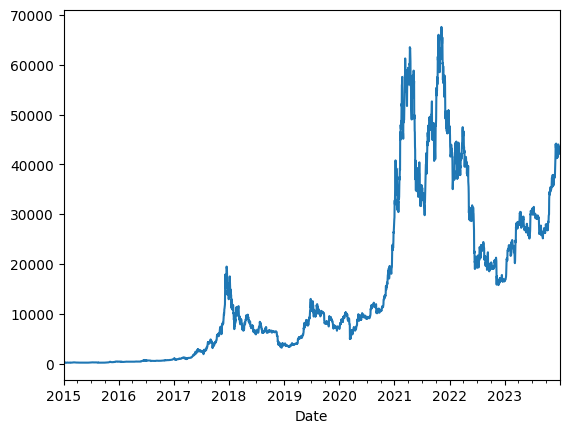

In [ ]:
import matplotlib.pyplot as plt
df['Adj Close'].plot()
plt.show()

### **Standardising and Normalising the Dataset**
It involves transforming the data to make it more suitable for modeling. These techniques can help to improve model performance, reduce the impact of outliers, and ensure that the data is on the same scale.

In [ ]:
features=['Open','High','Low','Volume']

In [ ]:
output_var=pd.DataFrame(df['Adj Close'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2015-01-01,0.002131,0.001585,0.002152,5.011966e-07
2015-01-02,0.002036,0.001518,0.002146,0.000000e+00
2015-01-03,0.002048,0.001508,0.001655,7.178523e-05
2015-01-04,0.001547,0.001101,0.001300,1.361079e-04
2015-01-05,0.001309,0.000971,0.001413,1.028668e-04


### **Splitting the Dataset**
The Dataset was splitted in training and testing set, where 10% data was given to the testing set and 90% data was given to the training set. This split was in 90-10 ratio, in order to avoid overfitting in the dataset

In [ ]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train

,Open,High,Low,Volume
Date,,,,
2019-12-01,0.041074,0.035296,0.051134,0.038739
2019-12-02,0.038714,0.033770,0.050203,0.033998
2019-12-03,0.037114,0.032888,0.050138,0.027388
2019-12-04,0.037053,0.034794,0.049200,0.047255
2019-12-05,0.035983,0.038003,0.050192,0.039015
...,...,...,...,...
2023-08-14,0.388198,0.383380,0.401720,0.025120
2023-08-15,0.390193,0.379895,0.401154,0.021147
2023-08-16,0.386372,0.376473,0.394938,0.027827


In [ ]:
X_test

,Open,High,Low,Volume
Date,,,,
2023-08-19,0.336470,0.329630,0.348381,0.015335
2023-08-20,0.337254,0.329807,0.351623,0.010721
2023-08-21,0.338722,0.329169,0.349082,0.023263
2023-08-22,0.337796,0.327835,0.343857,0.026538
2023-08-23,0.336353,0.338100,0.348422,0.033718
...,...,...,...,...
2023-12-27,0.599802,0.604360,0.611169,0.057661
2023-12-28,0.614986,0.606276,0.613593,0.051097
2023-12-29,0.601339,0.595553,0.599230,0.059799


In [ ]:
y_train

array([ 7424.29248047,  7321.98828125,  7320.14550781, ...,
       28701.77929688, 26664.55078125, 26049.55664062])

In [ ]:
y_test

array([26096.20507812, 26189.58398438, 26124.140625  , 26031.65625   ,
       26431.640625  , 26162.37304688, 26047.66796875, 26008.46289062,
       26089.69335938, 26106.15039062, 27727.39257812, 27297.265625  ,
       25931.47265625, 25800.72460938, 25868.79882812, 25969.56640625,
       25812.41601562, 25779.98242188, 25753.23632812, 26240.1953125 ,
       25905.65429688, 25895.67773438, 25832.2265625 , 25162.65429688,
       25833.34375   , 26228.32421875, 26539.67382812, 26608.69335938,
       26568.28125   , 26534.1875    , 26754.28125   , 27211.1171875 ,
       27132.0078125 , 26567.6328125 , 26579.56835938, 26579.390625  ,
       26256.82617188, 26298.48046875, 26217.25      , 26352.71679688,
       27021.546875  , 26911.72070312, 26967.91601562, 27983.75      ,
       27530.78515625, 27429.97851562, 27799.39453125, 27415.91210938,
       27946.59765625, 27968.83984375, 27935.08984375, 27583.67773438,
       27391.01953125, 26873.3203125 , 26756.79882812, 26862.375     ,
      

### **LSTM Model Implementation**
We wanted to figure out where Bitcoin prices might go, so we used a smart tool called the Long Short-Term Memory (LSTM) model. We taught it by showing nine years' worth of historical Bitcoin prices, hoping it would get really good at predicting the ups and downs.

To make sure our tool learns well, we made it go through 5000 rounds of learning, each time looking at eight pieces of data at a time. This way, it could catch the tricky parts in the Bitcoin price patterns. The graph we got at the end shows how well our tool can predict Bitcoin prices, and it matches up pretty well with the actual prices we've seen.

The trick our tool uses is looking at how prices changed in the past to guess what might happen next. This helps us understand and predict where Bitcoin prices might go in the future. Our tool is like a detective looking at the history of Bitcoin prices to make a good guess about what comes next.

So, in a nutshell, our tool, the LSTM model, learned a lot from nine years of Bitcoin price history. The graph it made shows that it's doing a pretty good job at telling us where Bitcoin prices might go. It's a step forward in understanding how Bitcoin behaves in the ever-changing world of cryptocurrency.

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
trainX

array([[0.04107362, 0.03529562, 0.05113379, 0.03873875],
       [0.03871412, 0.03377024, 0.05020336, 0.03399774],
       [0.03711436, 0.0328884 , 0.05013845, 0.02738804],
       ...,
       [0.38637242, 0.37647296, 0.39493804, 0.02782719],
       [0.37886974, 0.36897145, 0.34206507, 0.07461497],
       [0.34587504, 0.33843538, 0.34623706, 0.05408876]])

In [ ]:
testX

array([[3.36470196e-01, 3.29630372e-01, 3.48380551e-01, 1.53348008e-02],
       [3.37254073e-01, 3.29807378e-01, 3.51622719e-01, 1.07205250e-02],
       [3.38722247e-01, 3.29169466e-01, 3.49081951e-01, 2.32625282e-02],
       [3.37795852e-01, 3.27834825e-01, 3.43857399e-01, 2.65384031e-02],
       [3.36352566e-01, 3.38099769e-01, 3.48422139e-01, 3.37177466e-02],
       [3.42604567e-01, 3.34443980e-01, 3.50187335e-01, 2.18158480e-02],
       [3.38322361e-01, 3.29609165e-01, 3.48130119e-01, 2.04690963e-02],
       [3.36460640e-01, 3.27391648e-01, 3.51294569e-01, 2.03579184e-03],
       [3.35837236e-01, 3.28305457e-01, 3.50992984e-01, 4.57878314e-03],
       [3.37138223e-01, 3.28828719e-01, 3.49636132e-01, 1.64092275e-02],
       [3.37344005e-01, 3.58624269e-01, 3.50150452e-01, 6.95447391e-02],
       [3.63301982e-01, 3.53436919e-01, 3.68722537e-01, 3.18614321e-02],
       [3.56520630e-01, 3.48645041e-01, 3.47586036e-01, 4.29636833e-02],
       [3.34650600e-01, 3.27682934e-01, 3.41318355e

In [ ]:
X_train

array([[[0.04107362, 0.03529562, 0.05113379, 0.03873875]],

       [[0.03871412, 0.03377024, 0.05020336, 0.03399774]],

       [[0.03711436, 0.0328884 , 0.05013845, 0.02738804]],

       ...,

       [[0.38637242, 0.37647296, 0.39493804, 0.02782719]],

       [[0.37886974, 0.36897145, 0.34206507, 0.07461497]],

       [[0.34587504, 0.33843538, 0.34623706, 0.05408876]]])

In [ ]:
X_test

array([[[3.36470196e-01, 3.29630372e-01, 3.48380551e-01, 1.53348008e-02]],

       [[3.37254073e-01, 3.29807378e-01, 3.51622719e-01, 1.07205250e-02]],

       [[3.38722247e-01, 3.29169466e-01, 3.49081951e-01, 2.32625282e-02]],

       [[3.37795852e-01, 3.27834825e-01, 3.43857399e-01, 2.65384031e-02]],

       [[3.36352566e-01, 3.38099769e-01, 3.48422139e-01, 3.37177466e-02]],

       [[3.42604567e-01, 3.34443980e-01, 3.50187335e-01, 2.18158480e-02]],

       [[3.38322361e-01, 3.29609165e-01, 3.48130119e-01, 2.04690963e-02]],

       [[3.36460640e-01, 3.27391648e-01, 3.51294569e-01, 2.03579184e-03]],

       [[3.35837236e-01, 3.28305457e-01, 3.50992984e-01, 4.57878314e-03]],

       [[3.37138223e-01, 3.28828719e-01, 3.49636132e-01, 1.64092275e-02]],

       [[3.37344005e-01, 3.58624269e-01, 3.50150452e-01, 6.95447391e-02]],

       [[3.63301982e-01, 3.53436919e-01, 3.68722537e-01, 3.18614321e-02]],

       [[3.56520630e-01, 3.48645041e-01, 3.47586036e-01, 4.29636833e-02]],

       [[3.3

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
!pip install Keras

In [ ]:
#Building the LSTM Model
from tensorflow.keras.layers import LSTM, Dense, Dropout

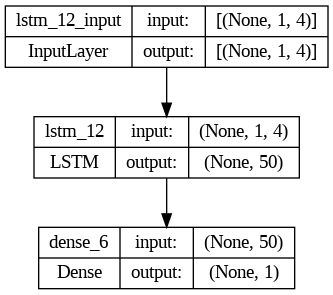

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

lstm = Sequential()
lstm.add(LSTM(50, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=5000, batch_size=8, verbose=1, shuffle=False)

Streaming output truncated to the last 5000 lines.
170/170 [==============================] - 1s 5ms/step - loss: 241857.5156
Epoch 2502/5000
170/170 [==============================] - 1s 4ms/step - loss: 241850.4062
Epoch 2503/5000
170/170 [==============================] - 1s 5ms/step - loss: 241843.2500
Epoch 2504/5000
170/170 [==============================] - 1s 4ms/step - loss: 241836.1875
Epoch 2505/5000
170/170 [==============================] - 1s 4ms/step - loss: 241828.9062
Epoch 2506/5000
170/170 [==============================] - 1s 4ms/step - loss: 241821.4531
Epoch 2507/5000
170/170 [==============================] - 1s 4ms/step - loss: 241814.5156
Epoch 2508/5000
170/170 [==============================] - 1s 4ms/step - loss: 241807.0625
Epoch 2509/5000
170/170 [==============================] - 1s 4ms/step - loss: 241799.8125
Epoch 2510/5000
170/170 [==============================] - 1s 4ms/step - loss: 241792.7031
Epoch 2511/5000
170/170 [==============================

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [ ]:
X_train

array([[[0.04107362, 0.03529562, 0.05113379, 0.03873875]],

       [[0.03871412, 0.03377024, 0.05020336, 0.03399774]],

       [[0.03711436, 0.0328884 , 0.05013845, 0.02738804]],

       ...,

       [[0.38637242, 0.37647296, 0.39493804, 0.02782719]],

       [[0.37886974, 0.36897145, 0.34206507, 0.07461497]],

       [[0.34587504, 0.33843538, 0.34623706, 0.05408876]]])

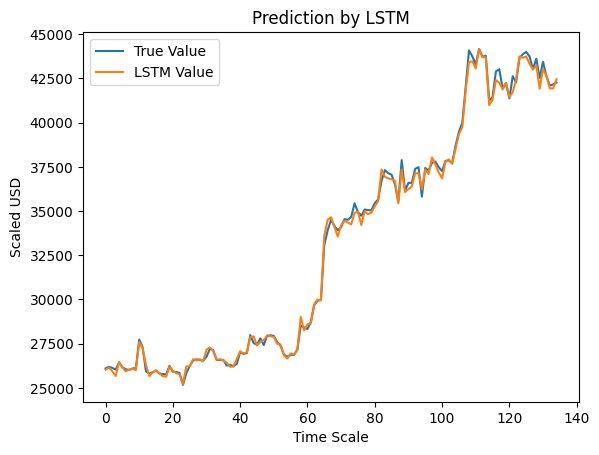

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
